In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
df=pd.read_csv(r'C:\Users\KIIT\Desktop\PROJECT AND COURSE FOLDER\DATA SCIENTIST R&R\KRISH NAIK\PYTHON\titanic\train.csv')

In [59]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

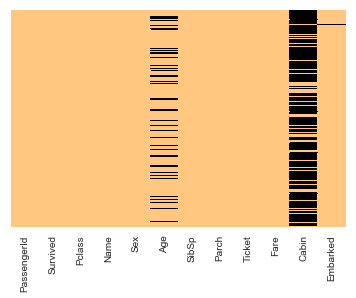

In [61]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='copper_r')
plt.show()

FEATURES "AGE" AND "CABIN" HAVE MISSING VALUES

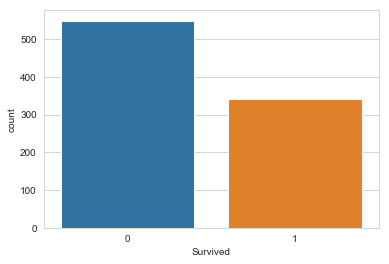

In [62]:
sns.set_style('whitegrid')
sns.countplot('Survived',data=df)

THIS SHOWS THAT MOST OF THE PEOPLE HAVE NOT SURVIVED

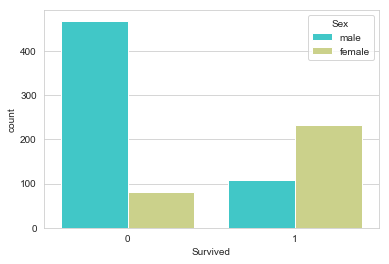

In [63]:
sns.countplot('Survived',hue='Sex',data=df,palette='rainbow')
plt.show()

AMONG THE PEOPLE WHO **HAVE NOT** SURVIVED MALE WHERE MORE THAN FEMALE-----(MALE>FEMALE)

AMONG THE PEOPLE WHO **HAVE** SURVIVED MALE WHERE MORE THAN FEMALE-----(MALE>FEMALE)

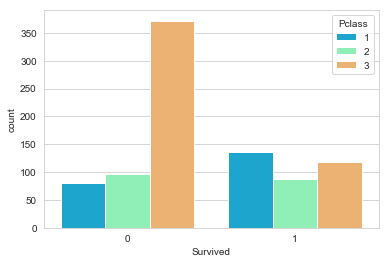

In [64]:
sns.countplot('Survived',hue='Pclass',data=df,palette='rainbow')
plt.show()

THIS COUNTPLOT SHOWS THAT MOST OF THE CLASS 3 PASSENGERS HAVE NOT SURVIVED AND MOST OF THE CLASS 1 PASSENGERS HAVE SURVIVED

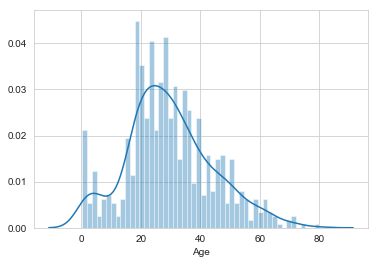

In [65]:
sns.distplot(df['Age'].dropna(),bins=50)
plt.show()

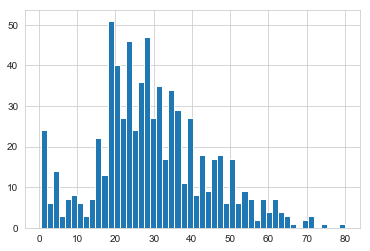

In [66]:
df['Age'].dropna().hist(bins=50)

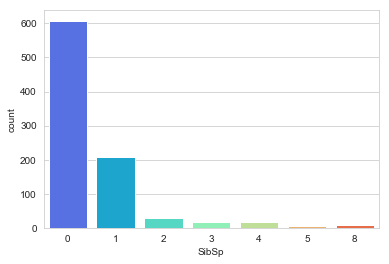

In [67]:
sns.countplot(df['SibSp'],palette='rainbow')

THIS SHOWS THAT MOST OF THE PEOPLE DID NOT HAVE ANY SIBLINGS OR SPOUSE

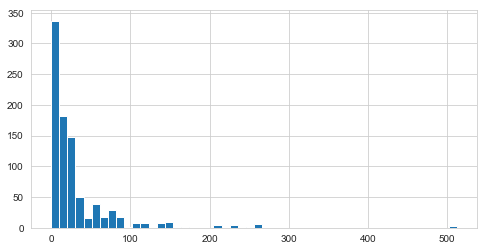

In [68]:
df['Fare'].hist(bins=50,figsize=(8,4))
plt.show()

In [69]:
import cufflinks as cf
cf.go_offline()

In [70]:
df['Fare'].iplot(kind='hist',bins=30,color='green')

# DATA CLEANING

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class

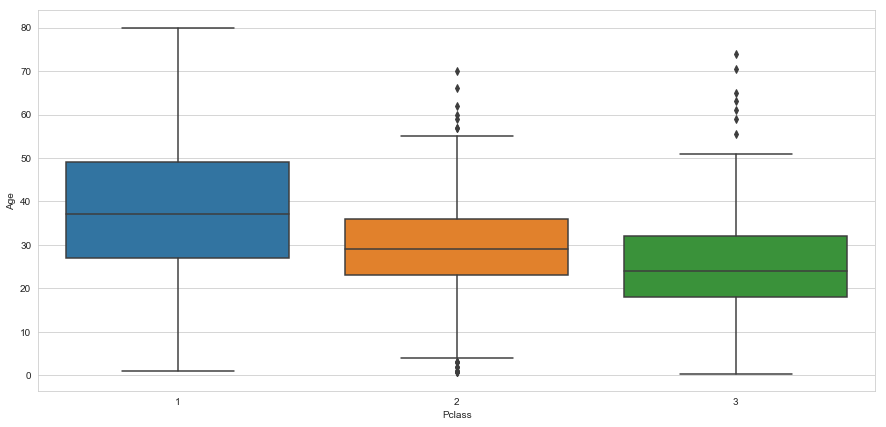

In [71]:
plt.figure(figsize=(15,7))
sns.boxplot('Pclass','Age',data=df)

HERE WE CAN SEE THAT THE AGE OF THE PASSENGERS HAS A RELATION TO THE PASSENGER CLASS

THE AVERAGE AGE OS PASSENGERS IN CLASS 1 IS 37 , CLASS 2 IS 29 AND CLASS 3 IS 24  

In [72]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass==2:
            return 29
        elif Pclass==3:
            return 24
    else:
        return Age

In [73]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

THIS FUNCTION WILL IMPUTE THE CHOSEN AGE VALUES IN THE AGE COLUMN BASED ON THE PASSENGER CLASS

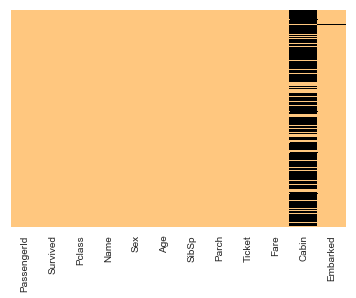

In [74]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='copper_r')
plt.show()

AGE COLUMN IS NOW FILLED

In [75]:
df.drop('Cabin',axis=1,inplace=True)

WE ARE DROPPING THE CABIN COLUMN BECAUSE IT HAS NO SERIOUS RELATION WITH ANYTHING ELSE AND THIS COLUMN IS ALSO NOT TOO IMPORTANT

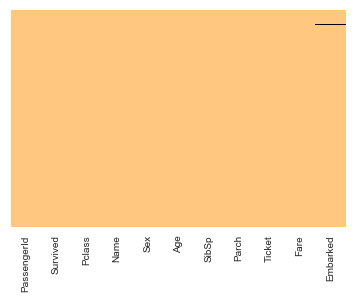

In [76]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='copper_r')
plt.show()

In [77]:
 df.dropna(inplace=True)

WE WILL DROP THE ROW WHICH HAS AN EMPTY VALUE

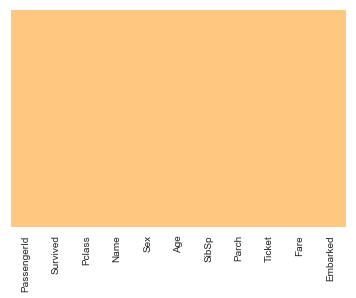

In [78]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='copper_r')
plt.show()

WE HAVE A CLEAN DATA WITH NO MISSING VALUES

In [85]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


WE HAVE SOME CATAGORICAL FEATURES SUCH AS SEX AND EMBARKED WHICH ARE IMPORTANT BUT IS NOT PERFECT BECAUSE WE NEED NUMERICAL VALUES THERE

In [86]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [88]:
pd.get_dummies(df['Embarked'],drop_first=True).head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


HERE WE HAVE CONVERTED THEM INTO NUMRICAL VALUE FORMS

WE ARE REMOVING THE FIRST COLUMN BECAUSE IT CAN BE REPRESENTED BY OTHER 2 COLUMNS

WE WILL DO THE SAME FOR SEX COLUMN

In [90]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [92]:
df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [93]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [94]:
df=pd.concat([df,sex,Embarked],axis=1)

In [95]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


 NOW JOINING ALL THE COLUMNS WITH NEW SEX AND EMBARKED COLUMN  

# APPLYING LOGISTIC REGRESSION 

OUR TAGET COLUMN IS SURVIVED SO WE WILL DROP IT FOR PREDICTION

### SPLITTING THE DATA INTO TRAIN AND TEST DATA

In [96]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                            df['Survived'], test_size=0.30, random_state=101)

####  TRAINING AND PREDICTION

In [100]:
from sklearn.linear_model import LogisticRegression

In [102]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
predict= lr.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,predict)

array([[151,  12],
       [ 36,  68]], dtype=int64)

In [106]:
accuracy_score(y_test,predict)

0.8202247191011236

In [107]:
predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

# EVALUATION

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

